In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyerrors as pe

In [2]:
plt.style.use('./base_style.mplstyle')
usetex = matplotlib.checkdep_usetex(True)
plt.rc('text', usetex=usetex)

We can load data from a preprocessed file which contains a list of `pyerror` `Obs`:

In [3]:
correlator_data = pe.input.json.load_json("./data/correlator_test")

Data has been written using pyerrors 2.0.0.
Format version 0.1
Written by fjosw on 2022-01-06 11:11:19 +0100 on host XPS139305, Linux-5.11.0-44-generic-x86_64-with-glibc2.29

Description:  Test data for the correlator example


With this list a `Corr` object can be initialised

In [4]:
my_correlator = pe.Corr(correlator_data)
my_correlator.gamma_method()

In [5]:
my_correlator.print([8, 14])

Corr T=96 N=1
x0/a	Corr(x0/a)
------------------
8	 548(13)
9	 433(11)
10	 343.1(8.6)
11	 273.2(6.6)
12	 217.5(5.6)
13	 172.9(4.9)
14	 137.6(4.6)



The `show` method can display the correlator.

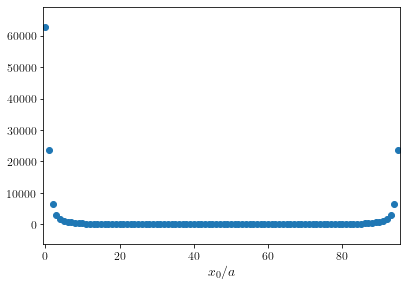

In [6]:
my_correlator.show()

## Manipulating correlators

Arithmetic operations are overloaded for `Corr` objects as is the case for `Obs` objects.

In [7]:
new_correlator = 1 + 1 / my_correlator ** 2

In addition to that various useful methods for the manipulation of `Corr` objects are implemented. A correlator can for example be periodically shifted

In [8]:
shifted_correlator = my_correlator.roll(20)
shifted_correlator.tag = r'Correlator shifted by $x_0/a=20$'

or symmetrised

In [9]:
symmetrised_correlator = my_correlator.symmetric()
symmetrised_correlator.tag = 'Symmetrised correlator'

The full list of `Corr` methods can be found in the documentation.

We can visually compare different `Corr` objects by passing `comp` to the `show` method. The argument <code>auto_gamma</code> tells `show` to calculate the y-errors using the gamma method with the default parameters.

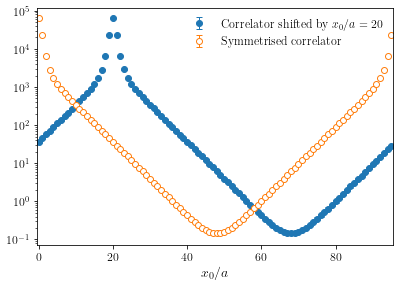

In [10]:
shifted_correlator.show(comp=symmetrised_correlator, logscale=True, auto_gamma=True)

## Effective mass

The effective mass of the correlator can be obtained by calling the `m_eff` method

In [11]:
m_eff = symmetrised_correlator.m_eff()
m_eff.tag = 'Effective mass'

We can also use the periodicity of the lattice in order to obtain the cosh effective mass

In [12]:
periodic_m_eff = symmetrised_correlator.m_eff('periodic')
periodic_m_eff.tag = 'Cosh effective mass'

We can compare the two and see how the standard effective mass deviates from the plateau at the center of the lattice

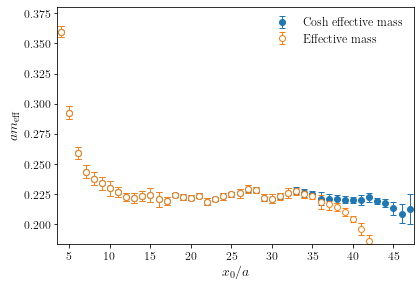

In [13]:
periodic_m_eff.show([4,47], comp=m_eff, ylabel=r'$am_\mathrm{eff}$', auto_gamma=True)

## Derivatives

We can obtain derivatives of correlators in the following way

In [14]:
first_derivative = symmetrised_correlator.deriv()
first_derivative.tag = 'First derivative'

In [15]:
second_derivative = symmetrised_correlator.second_deriv()
second_derivative.tag = 'Second derivative'

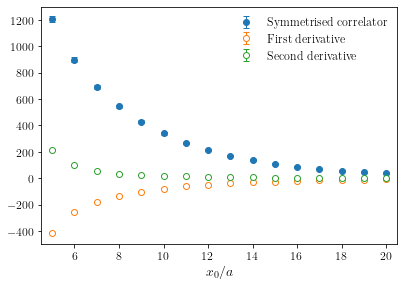

In [16]:
symmetrised_correlator.show([5, 20], comp=[first_derivative, second_derivative], y_range=[-500, 1300], auto_gamma=True)

## Missing Values 

Apart from the build-in functions, another benefit of using ``Corr`` objects is that they can handle missing values. 
We will create a second correlator with missing values. 

In [17]:
new_content=[(my_correlator.content[i] if i not in [6,8,9,12,14,15,20] else None ) for i in range(my_correlator.T) ] # We reuse the old example and replace a few values with None
correlator_incomplete=pe.Corr(new_content)

correlator_incomplete.print([0, 22]) # Print the correlator in the range 0 - 22

Corr T=96 N=1
x0/a	Corr(x0/a)
------------------
0	 62865(41)
1	 23756(32)
2	 6434(25)
3	 2886(20)
4	 1735(21)
5	 1213(21)
6
7	 699(17)
8
9
10	 343.1(8.6)
11	 273.2(6.6)
12
13	 172.9(4.9)
14
15
16	 88.0(3.9)
17	 70.6(3.2)
18	 56.6(2.6)
19	 45.3(2.1)
20
21	 29.2(1.4)
22	 23.4(1.2)



We see that this is still a valid correlator. It is just missing some values. 
When we perform operations, which generate new correlators, the missing values are handled automatically.

Some functions might also return correlators with missing values. We already looked at the derivative. 
The symmertic derivative is not defined for the first and last timeslice. Whatever operation is performed on a `Corr` object, the correlators keeps its length **T**. So there will never be confusion about how to count timeslices. One can also take a plateau or perform a fit, even though some values might be missing.